In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:

raw_dataset = pd.read_csv('Dallas data summary Interpolated.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,3/1/2005,117.37315,5.93,37170.0,5816.4070,5.3,284456.5080,1309.5483,43.20%,133706.0000,2.30%,4281,4.19,188.90
1,4/1/2005,118.36502,5.86,37443.3,5834.7074,5.1,286767.0694,1303.3853,43.27%,133866.0000,2.30%,5548,4.69,189.67
2,5/1/2005,119.47166,5.72,37716.6,5853.0078,5.1,289077.6308,1297.2223,43.33%,134026.0000,2.30%,4878,4.58,190.44
3,6/1/2005,120.02775,5.58,37989.9,5871.3082,5.4,291388.1922,1291.0593,43.40%,134186.0000,2.30%,5304,4.83,191.21
4,7/1/2005,120.82903,5.70,38263.2,5889.6086,5.4,293698.7536,1284.8963,43.40%,134134.6667,2.30%,5140,5.06,191.98
5,8/1/2005,121.15007,5.82,38536.5,5907.9090,5.2,296009.3150,1278.7333,43.40%,134083.3333,2.30%,6042,4.36,192.75
6,9/1/2005,121.62157,5.77,38809.8,5926.2094,5.1,298319.8764,1272.5703,43.40%,134032.0000,2.30%,4361,4.39,193.52
7,10/1/2005,121.66380,6.07,39083.1,5944.5098,4.8,300630.4378,1266.4073,43.33%,134201.0000,2.37%,4814,4.45,194.29
8,11/1/2005,122.11284,6.33,39356.4,5962.8102,5.0,302940.9992,1260.2443,43.27%,134370.0000,2.43%,4713,4.34,195.06
9,12/1/2005,122.20399,6.27,39629.7,5981.1106,4.8,305251.5606,1254.0813,43.20%,134539.0000,2.50%,5458,4.32,195.83


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,117.37315,5.93,37170.0,5816.4070,5.3,284456.5080,1309.5483,133706.0000,4281,4.19,188.90,43.20,2.3
1,4/1/2005,118.36502,5.86,37443.3,5834.7074,5.1,286767.0694,1303.3853,133866.0000,5548,4.69,189.67,43.27,2.3
2,5/1/2005,119.47166,5.72,37716.6,5853.0078,5.1,289077.6308,1297.2223,134026.0000,4878,4.58,190.44,43.33,2.3
3,6/1/2005,120.02775,5.58,37989.9,5871.3082,5.4,291388.1922,1291.0593,134186.0000,5304,4.83,191.21,43.40,2.3
4,7/1/2005,120.82903,5.70,38263.2,5889.6086,5.4,293698.7536,1284.8963,134134.6667,5140,5.06,191.98,43.40,2.3


In [4]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [5]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,37170.0,5816.40700,5.3,284456.5080,1309.548300,133706.0000,4281,4.19,188.900000,43.20,2.30
1,5.86,37443.3,5834.70740,5.1,286767.0694,1303.385300,133866.0000,5548,4.69,189.670000,43.27,2.30
2,5.72,37716.6,5853.00780,5.1,289077.6308,1297.222300,134026.0000,4878,4.58,190.440000,43.33,2.30
3,5.58,37989.9,5871.30820,5.4,291388.1922,1291.059300,134186.0000,5304,4.83,191.210000,43.40,2.30
4,5.70,38263.2,5889.60860,5.4,293698.7536,1284.896300,134134.6667,5140,5.06,191.980000,43.40,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...
149,3.88,55616.5,7406.31475,3.9,494271.7254,770.566467,141868.3333,6620,3.91,223.875917,34.83,1.20
150,3.81,55866.0,7416.20300,3.5,496571.0833,771.585750,142486.0000,4446,4.15,224.251333,34.70,1.20
151,3.90,56115.5,7426.09125,3.3,498870.4413,772.605033,143060.0000,6459,4.03,224.626750,34.63,1.27
152,3.92,56365.0,7435.97950,3.4,501169.7992,773.624317,143634.0000,3754,3.73,225.002167,34.57,1.33


In [6]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),154.0,4.769286,1.037777,3.3500,3.912500,4.430000,5.850000,6.760000
Personal_Income,154.0,45938.311688,5140.283086,37170.0000,41208.437500,45839.166665,50452.250000,56614.500000
Resident_Population,154.0,6643.101334,438.076717,5816.4070,6352.981042,6583.135458,7001.183479,7445.867750
Unemployment_Rate,154.0,5.522078,1.552070,3.3000,4.100000,5.150000,6.775000,8.700000
GDP,154.0,380112.103103,59440.837770,284456.5080,331357.882050,365689.391650,430273.328675,503469.157100
Crime_Rate,154.0,846.791258,213.924261,663.7371,679.451525,752.616733,992.892338,1309.548300
Median_Debt,154.0,133522.149351,3829.751495,127063.0000,130323.500025,134240.500000,136127.499975,144208.000000
New_Structures,154.0,3387.207792,1389.015967,1098.0000,2245.750000,3325.500000,4372.250000,7374.000000
Economic_Conditions_Index,154.0,3.324026,2.089403,-4.4600,3.530000,4.010000,4.405000,5.220000
CPI all items less shelter,154.0,213.928282,10.028485,188.9000,207.413062,219.690250,221.930729,225.377583


In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.118462,-1.705803,-1.887099,-0.143085,-1.609257,2.163182,0.048006,0.643472,0.414460,-2.495719,0.888291,-0.544667
1,1.051011,-1.652635,-1.845325,-0.271945,-1.570386,2.134372,0.089784,1.555628,0.653763,-2.418938,0.910472,-0.544667
2,0.916107,-1.599467,-1.803551,-0.271945,-1.531514,2.105563,0.131562,1.073272,0.601116,-2.342157,0.929485,-0.544667
3,0.781203,-1.546298,-1.761776,-0.078655,-1.492642,2.076754,0.173340,1.379964,0.720768,-2.265375,0.951667,-0.544667
4,0.896835,-1.493130,-1.720002,-0.078655,-1.453771,2.047945,0.159937,1.261895,0.830847,-2.188594,0.951667,-0.544667
...,...,...,...,...,...,...,...,...,...,...,...,...
149,-0.856914,1.882812,1.742191,-1.045106,1.920559,-0.356317,2.179302,2.327397,0.280450,0.991938,-1.763989,-1.663050
150,-0.924366,1.931351,1.764763,-1.302827,1.959242,-0.351552,2.340583,0.762261,0.395316,1.029373,-1.805183,-1.663050
151,-0.837642,1.979889,1.787335,-1.431687,1.997925,-0.346787,2.490462,2.211488,0.337883,1.066808,-1.827364,-1.591880
152,-0.818370,2.028427,1.809907,-1.367257,2.036608,-0.342023,2.640341,0.264066,0.194301,1.104243,-1.846377,-1.530878


In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

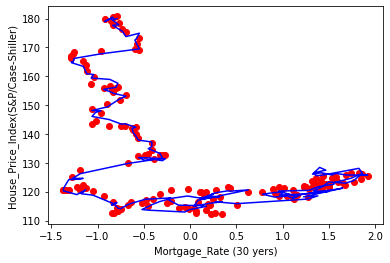

In [10]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 1.45
Accuracy: 98.86 %.


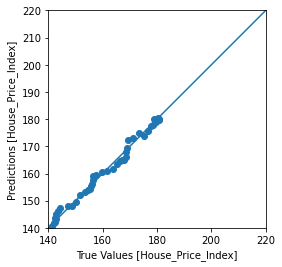

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [12]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.9915678197468561

In [14]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,2.489423
1,-21.716615
2,-7.310221
3,2.839892
4,51.874202
5,-0.524990
6,2.578412
7,0.782767
8,1.267478
9,-4.375084


In [15]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [16]:
print(y_pred)

[117.61515418 118.49731402 118.10797901 119.11150163 119.64751873
 119.85416251 118.82319289 119.25303115 120.14102798 120.00629545
 120.30069569 121.67303981 123.33016419 122.97485556 123.79547181
 125.8597578  125.73488805 125.78150842 126.3472889  125.79490627
 126.55735567 126.05407379 128.41838628 127.46678635 126.58670593
 125.55011016 125.75903619 128.09194564 126.36428856 124.64229914
 123.12339466 122.56736084 121.78205829 120.46234546 120.22535653
 118.71888386 118.31370618 117.93356921 119.20780854 120.48731418
 120.92338347 121.25672658 118.20326959 118.54518024 117.44826158
 115.84345435 116.50586898 116.47839137 116.00869571 114.97097903
 117.03166857 120.61487443 120.18585287 120.28409455 119.65352414
 118.37579987 117.68036346 117.45161281 119.39566879 118.34497675
 118.60869489 118.12236507 117.73765138 118.49621243 117.68994651
 116.59356306 115.60918048 113.81845981 113.59604808 112.95528626
 113.73014846 114.91240486 115.30672604 115.18570557 115.33066205
 117.45711

In [17]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,117.615154
1,118.497314
2,118.107979
3,119.111502
4,119.647519
...,...
149,179.998152
150,178.953096
151,180.490425
152,179.695350


In [18]:
X_transpose=X.transpose()

In [19]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
Mortgage_Rate (30 yers),1.118462,1.051011,0.916107,0.781203,0.896835,1.012467,0.964287,1.253366,1.503902,1.446086,...,-0.548563,-0.693103,-0.731647,-0.837642,-0.770190,-0.856914,-0.924366,-0.837642,-0.818370,-0.789462
Personal_Income,-1.705803,-1.652635,-1.599467,-1.546298,-1.493130,-1.439962,-1.386794,-1.333625,-1.280457,-1.227289,...,1.640121,1.688660,1.737198,1.785736,1.834274,1.882812,1.931351,1.979889,2.028427,2.076965
Resident_Population,-1.887099,-1.845325,-1.803551,-1.761776,-1.720002,-1.678227,-1.636453,-1.594679,-1.552904,-1.511130,...,1.629331,1.651903,1.674475,1.697047,1.719619,1.742191,1.764763,1.787335,1.809907,1.832479
Unemployment_Rate,-0.143085,-0.271945,-0.271945,-0.078655,-0.078655,-0.207515,-0.271945,-0.465235,-0.336375,-0.465235,...,-1.045106,-1.302827,-1.238396,-1.045106,-1.045106,-1.045106,-1.302827,-1.431687,-1.367257,-1.431687
GDP,-1.609257,-1.570386,-1.531514,-1.492642,-1.453771,-1.414899,-1.376027,-1.337156,-1.298284,-1.259413,...,1.727143,1.765826,1.804509,1.843193,1.881876,1.920559,1.959242,1.997925,2.036608,2.075291
Crime_Rate,2.163182,2.134372,2.105563,2.076754,2.047945,2.019135,1.990326,1.961517,1.932708,1.903898,...,-0.380140,-0.375375,-0.370611,-0.365846,-0.361081,-0.356317,-0.351552,-0.346787,-0.342023,-0.337258
Median_Debt,0.048006,0.089784,0.131562,0.173340,0.159937,0.146533,0.133129,0.177257,0.221385,0.265513,...,1.383079,1.540966,1.698853,1.856739,2.018021,2.179302,2.340583,2.490462,2.640341,2.790220
New_Structures,0.643472,1.555628,1.073272,1.379964,1.261895,1.911276,0.701066,1.027196,0.954483,1.490834,...,2.166852,0.588757,1.157504,1.635541,0.621154,2.327397,0.762261,2.211488,0.264066,0.175514
Economic_Conditions_Index,0.414460,0.653763,0.601116,0.720768,0.830847,0.495823,0.510181,0.538897,0.486251,0.476679,...,0.290023,0.175157,0.213446,0.294809,0.208660,0.280450,0.395316,0.337883,0.194301,0.103366
CPI all items less shelter,-2.495719,-2.418938,-2.342157,-2.265375,-2.188594,-2.111813,-2.035032,-1.958250,-1.881469,-1.804688,...,0.804763,0.842198,0.879633,0.917068,0.954503,0.991938,1.029373,1.066808,1.104243,1.141678


In [20]:
X_transpose=X_transpose.reset_index()

In [21]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,144,145,146,147,148,149,150,151,152,153
0,Mortgage_Rate (30 yers),1.118462,1.051011,0.916107,0.781203,0.896835,1.012467,0.964287,1.253366,1.503902,...,-0.548563,-0.693103,-0.731647,-0.837642,-0.770190,-0.856914,-0.924366,-0.837642,-0.818370,-0.789462
1,Personal_Income,-1.705803,-1.652635,-1.599467,-1.546298,-1.493130,-1.439962,-1.386794,-1.333625,-1.280457,...,1.640121,1.688660,1.737198,1.785736,1.834274,1.882812,1.931351,1.979889,2.028427,2.076965
2,Resident_Population,-1.887099,-1.845325,-1.803551,-1.761776,-1.720002,-1.678227,-1.636453,-1.594679,-1.552904,...,1.629331,1.651903,1.674475,1.697047,1.719619,1.742191,1.764763,1.787335,1.809907,1.832479
3,Unemployment_Rate,-0.143085,-0.271945,-0.271945,-0.078655,-0.078655,-0.207515,-0.271945,-0.465235,-0.336375,...,-1.045106,-1.302827,-1.238396,-1.045106,-1.045106,-1.045106,-1.302827,-1.431687,-1.367257,-1.431687
4,GDP,-1.609257,-1.570386,-1.531514,-1.492642,-1.453771,-1.414899,-1.376027,-1.337156,-1.298284,...,1.727143,1.765826,1.804509,1.843193,1.881876,1.920559,1.959242,1.997925,2.036608,2.075291
5,Crime_Rate,2.163182,2.134372,2.105563,2.076754,2.047945,2.019135,1.990326,1.961517,1.932708,...,-0.380140,-0.375375,-0.370611,-0.365846,-0.361081,-0.356317,-0.351552,-0.346787,-0.342023,-0.337258
6,Median_Debt,0.048006,0.089784,0.131562,0.173340,0.159937,0.146533,0.133129,0.177257,0.221385,...,1.383079,1.540966,1.698853,1.856739,2.018021,2.179302,2.340583,2.490462,2.640341,2.790220
7,New_Structures,0.643472,1.555628,1.073272,1.379964,1.261895,1.911276,0.701066,1.027196,0.954483,...,2.166852,0.588757,1.157504,1.635541,0.621154,2.327397,0.762261,2.211488,0.264066,0.175514
8,Economic_Conditions_Index,0.414460,0.653763,0.601116,0.720768,0.830847,0.495823,0.510181,0.538897,0.486251,...,0.290023,0.175157,0.213446,0.294809,0.208660,0.280450,0.395316,0.337883,0.194301,0.103366
9,CPI all items less shelter,-2.495719,-2.418938,-2.342157,-2.265375,-2.188594,-2.111813,-2.035032,-1.958250,-1.881469,...,0.804763,0.842198,0.879633,0.917068,0.954503,0.991938,1.029373,1.066808,1.104243,1.141678


In [22]:
X_transpose_index=X_transpose[['index']]

In [23]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI all items less shelter


In [24]:
X_transpose_index=X_transpose_index.join(coef)

In [25]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),2.489423
1,Personal_Income,-21.716615
2,Resident_Population,-7.310221
3,Unemployment_Rate,2.839892
4,GDP,51.874202
5,Crime_Rate,-0.524990
6,Median_Debt,2.578412
7,New_Structures,0.782767
8,Economic_Conditions_Index,1.267478
9,CPI all items less shelter,-4.375084


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

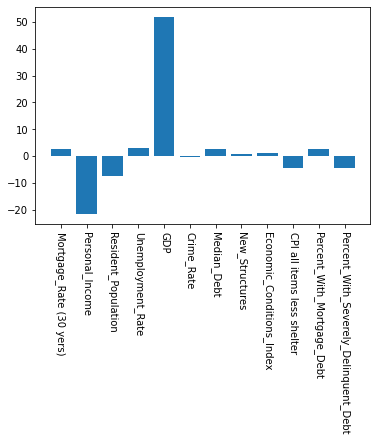

In [26]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [27]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,1/1/2018,181.23406,4.03,56864.00000,7455.756000,3.7,505768.5150,773.834725,34.57%,144725.6667,1.37%,5687,3.46,225.753000
1,2/1/2018,182.28582,4.33,57019.08333,7465.537667,3.7,507276.3032,773.025850,34.63%,145243.3333,1.33%,3979,3.59,226.013667
2,3/1/2018,183.58835,4.44,57174.16667,7475.319333,3.6,508784.0913,772.216975,34.70%,145761.0000,1.30%,4814,3.72,226.274333
3,4/1/2018,185.27276,4.47,57329.25000,7485.101000,3.3,510291.8795,771.408100,34.63%,146290.3333,1.23%,8213,3.81,226.535000
4,5/1/2018,186.42279,4.59,57484.33333,7494.882667,3.3,511799.6677,770.599225,34.57%,146819.6667,1.17%,4805,4.16,226.795667
5,6/1/2018,187.15900,4.57,57639.41667,7504.664333,3.9,513307.4558,769.790350,34.50%,147349.0000,1.10%,5813,4.25,227.056333
6,7/1/2018,187.50014,4.53,57794.50000,7514.446000,3.7,514815.2440,768.981475,34.47%,148290.6667,1.10%,5275,4.22,227.317000
7,8/1/2018,187.43342,4.55,57949.58333,7524.227667,3.6,516323.0322,768.172600,34.43%,149232.3333,1.10%,5416,4.18,227.577667
8,9/1/2018,187.42928,4.63,58104.66667,7534.009333,3.4,517830.8203,767.363725,34.40%,150174.0000,1.10%,4336,4.02,227.838333
9,10/1/2018,187.49068,4.83,58259.75000,7543.791000,3.3,519338.6085,766.554850,34.27%,150611.3333,1.10%,4505,4.09,228.099000


In [28]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1/1/2018,181.23406,4.03,56864.00000,7455.756000,3.7,505768.5150,773.834725,144725.6667,5687,3.46,225.753000,34.57,1.37
1,2/1/2018,182.28582,4.33,57019.08333,7465.537667,3.7,507276.3032,773.025850,145243.3333,3979,3.59,226.013667,34.63,1.33
2,3/1/2018,183.58835,4.44,57174.16667,7475.319333,3.6,508784.0913,772.216975,145761.0000,4814,3.72,226.274333,34.70,1.30
3,4/1/2018,185.27276,4.47,57329.25000,7485.101000,3.3,510291.8795,771.408100,146290.3333,8213,3.81,226.535000,34.63,1.23
4,5/1/2018,186.42279,4.59,57484.33333,7494.882667,3.3,511799.6677,770.599225,146819.6667,4805,4.16,226.795667,34.57,1.17


In [29]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,4.03,56864.00000,7455.756000,3.7,505768.5150,773.834725,144725.6667,5687,3.46,225.753000,34.57,1.37
1,4.33,57019.08333,7465.537667,3.7,507276.3032,773.025850,145243.3333,3979,3.59,226.013667,34.63,1.33
2,4.44,57174.16667,7475.319333,3.6,508784.0913,772.216975,145761.0000,4814,3.72,226.274333,34.70,1.30
3,4.47,57329.25000,7485.101000,3.3,510291.8795,771.408100,146290.3333,8213,3.81,226.535000,34.63,1.23
4,4.59,57484.33333,7494.882667,3.3,511799.6677,770.599225,146819.6667,4805,4.16,226.795667,34.57,1.17
5,4.57,57639.41667,7504.664333,3.9,513307.4558,769.790350,147349.0000,5813,4.25,227.056333,34.50,1.10
6,4.53,57794.50000,7514.446000,3.7,514815.2440,768.981475,148290.6667,5275,4.22,227.317000,34.47,1.10
7,4.55,57949.58333,7524.227667,3.6,516323.0322,768.172600,149232.3333,5416,4.18,227.577667,34.43,1.10
8,4.63,58104.66667,7534.009333,3.4,517830.8203,767.363725,150174.0000,4336,4.02,227.838333,34.40,1.10
9,4.83,58259.75000,7543.791000,3.3,519338.6085,766.554850,150611.3333,4505,4.09,228.099000,34.27,1.10


In [30]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,4.540000,0.220289,4.0300,4.462500,4.560000,4.632500,4.870000
Personal_Income,12.0,57716.958333,559.160911,56864.0000,57290.479168,57716.958335,58143.437503,58569.916670
Resident_Population,12.0,7509.555167,35.268301,7455.7560,7482.655583,7509.555167,7536.454750,7563.354333
Unemployment_Rate,12.0,3.500000,0.225630,3.2000,3.300000,3.500000,3.700000,3.900000
GDP,12.0,514061.349917,5436.407544,505768.5150,509914.932450,514061.349900,518207.767350,522354.184800
Crime_Rate,12.0,769.385912,2.916440,764.9371,767.161506,769.385913,771.610319,773.834725
Median_Debt,12.0,148086.000000,2385.178124,144725.6667,146157.999975,147819.833350,150283.333325,151486.000000
New_Structures,12.0,5155.166667,1129.571587,3979.0000,4462.750000,4867.000000,5483.750000,8213.000000
Economic_Conditions_Index,12.0,3.956667,0.258750,3.4600,3.787500,4.035000,4.165000,4.250000
CPI all items less shelter,12.0,227.186667,0.939847,225.7530,226.469833,227.186667,227.903500,228.620333


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.712375,2.125503,1.855051,-1.173966,2.113974,-0.341039,2.925390,1.655699,0.065078,1.179113,-1.846377,-1.490209
1,-0.423295,2.155673,1.877380,-1.173966,2.139341,-0.344820,3.060560,0.426051,0.127297,1.205106,-1.827364,-1.530878
2,-0.317299,2.185844,1.899708,-1.238396,2.164707,-0.348601,3.195730,1.027196,0.189515,1.231098,-1.805183,-1.561379
3,-0.288391,2.216014,1.922037,-1.431687,2.190073,-0.352382,3.333946,3.474253,0.232590,1.257091,-1.827364,-1.632549
4,-0.172759,2.246184,1.944366,-1.431687,2.215439,-0.356164,3.472162,1.020717,0.400102,1.283084,-1.846377,-1.693551
5,-0.192031,2.276354,1.966694,-1.045106,2.240805,-0.359945,3.610378,1.746411,0.443176,1.309076,-1.868559,-1.764721
6,-0.230575,2.306524,1.989023,-1.173966,2.266172,-0.363726,3.856260,1.359086,0.428818,1.335069,-1.878065,-1.764721
7,-0.211303,2.336695,2.011352,-1.238396,2.291538,-0.367507,4.102142,1.460597,0.409674,1.361061,-1.890740,-1.764721
8,-0.134215,2.366865,2.033680,-1.367257,2.316904,-0.371288,4.348024,0.683068,0.333097,1.387054,-1.900247,-1.764721
9,0.058504,2.397035,2.056009,-1.431687,2.342270,-0.375069,4.462217,0.804737,0.366599,1.413047,-1.941441,-1.764721


In [32]:
y_pred_2 = regressor.predict(X_2)


In [33]:
print(y_pred_2)

[183.22907957 184.03335434 185.59321946 188.09962805 187.65380656
 190.3396193  190.55228508 191.46052166 191.57674389 192.58853903
 193.28051851 192.95361342]


In [34]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,183.229080
1,184.033354
2,185.593219
3,188.099628
4,187.653807
5,190.339619
6,190.552285
7,191.460522
8,191.576744
9,192.588539
